<a href="https://colab.research.google.com/github/SwathiSajith/Sentiment_Analysis_on_Restaurant_reviews/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAJOR PROJECT**
## By-Swathi Sajith

*Topic-Sentiment Analysis*

In [ ]:
import pandas as pd      #library to create a dataframe

In [ ]:
df= pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')   #Since it is a tsv file we have to first convert in so as it can be read as csv file
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()              #information on the dataframe is given

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.isnull().value_counts()    #seeing whether there are any null values

Review  Liked
False   False    1000
dtype: int64

In [ ]:
df.shape                     #Viewing how many columns and rows are present

(1000, 2)

In [ ]:
df.head()                    #gives first 5 values

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df['Review'][341]           #positive review is given

'Of all the dishes, the salmon was the best, but all were great.'

In [ ]:
df['Liked'][341]           # positive review is represented as 1

1

In [ ]:
df['Review'][450]          #negative review is given

"I don't think we'll be going back anytime soon."

In [ ]:
df['Liked'][450]           #negative review is represented as 1

0

In [ ]:
df['Liked'].value_counts()  # No of positive and negative reviews in the dataset

1    500
0    500
Name: Liked, dtype: int64

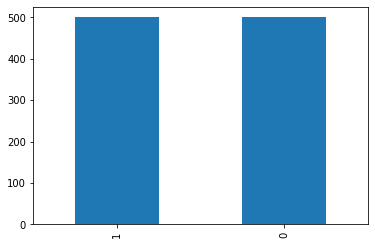

In [ ]:
df['Liked'].value_counts().plot(kind='bar')   #plotting a bar graph

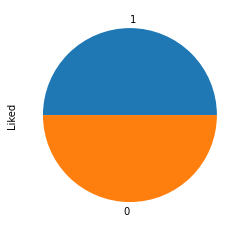

In [ ]:
df['Liked'].value_counts().plot(kind='pie')  #plotting a pie chart

In [ ]:
x=df['Review'].values                      #assigning x and y values
y=df['Liked'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state= 0)

In [ ]:
x_train.shape

(800,)

In [ ]:
x_test.shape

(200,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')              #removing the stop words

In [ ]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [ ]:
x_train_vect.toarray()                      # all text is converted to numerical values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.svm import SVC        #importing support vector machine
model=SVC()                        #model1
model.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred=model.predict(x_test_vect)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score         # accuracy score of svc model
accuracy_score(y_pred,y_test)

0.73

In [ ]:
from sklearn.pipeline import make_pipeline         # using the pipeline method
model2=make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
y_pred2=model2.predict(x_test)
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1])

In [ ]:
accuracy_score(y_pred2,y_test)     #accuracy score of pipeline method of svc and countvectorizer

0.79

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()                     # using multinomialnb

In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3=model3.predict(x_test_vect)
y_pred3

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
accuracy_score(y_pred3,y_test)                  # accuracy score of multinomialnb

0.745

In [ ]:
from sklearn.pipeline import make_pipeline         #pipeline method of multinomialnb and countvectorizer
model4=make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
y_pred4=model4.predict(x_test)
y_pred4

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
accuracy_score(y_pred4,y_test)

0.81

## **Accuracy Scores of the four methods of classification we have used**

### SVC --0.73

### Pipeline(CountVectorizer,SVC) --0.79

### MultinomialNB --0.745

### Pipeline(CountVectorizer,MultinomialNB) --0.81

Here we can see the pipeline of MultinomialNB and countvectorizer has highest accuracy score





In [ ]:
import joblib
joblib.dump(model4,'Review Classification')# using model4 since it has high accuracy score

['Review Classification']

In [ ]:
reload_model=joblib.load('Review Classification')

In [ ]:
reload_model.predict(['The ambience of the place was okay .It gives me the feels '])  #predicting the values

array([1])

In [ ]:
reload_model.predict(['it was soo bad that i wish i would never visit the restraunt again'])

array([0])

In [ ]:
!pip install streamlit --quiet        #installing streamit

     |████████████████████████████████| 10.1 MB 5.6 MB/s 
     |████████████████████████████████| 111 kB 47.5 MB/s 
     |████████████████████████████████| 76 kB 5.0 MB/s 
     |████████████████████████████████| 181 kB 43.3 MB/s 
     |████████████████████████████████| 164 kB 49.1 MB/s 
     |████████████████████████████████| 4.3 MB 36.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 131 kB 39.2 MB/s 
     |████████████████████████████████| 130 kB 43.7 MB/s 
     |████████████████████████████████| 793 kB 48.3 MB/s 
     |████████████████████████████████| 428 kB 50.1 MB/s 
     |████████████████████████████████| 381 kB 51.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
st.title("Classification of Reviews")
reload_model=joblib.load('Review Classification')
add_selectbox = st.sidebar.selectbox(
    'Which age group do you belong to?',
    ('10-15', '15-18', '19-25','26-34','35-42','43-50','51-60','Above 60')
)
add_selectbox = st.sidebar.selectbox(
    'Which review site do you use the most?',
    ('Amazon Customer Reviews', 'Angies List', 'Yelp','Facebook','Foursquare')
)
ip=st.text_input("Enter the Review:")
op=reload_model.predict([ip])
if st.button('Predict'):
  if (op[0]==1):
    st.title("Good Review")
    st.balloons()
  else:
    st.title("bad Review")
    st.snow()

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501        #running the streamlit website

2022-04-11 17:45:20.587 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.281s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://104.198.197.156:8501

your url is: https://lucky-bird-96.loca.lt
  Stopping...
^C
